In [42]:
import pandas as pd
from sqlalchemy import create_engine
import os
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt



In [43]:
# variables to populate the database connection string
db_user = 'postgres'
db_password = '*****'
db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "sql_homework"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")
connection = engine.connect()

In [44]:
salary_data = pd.read_sql("SELECT salary FROM salaries", engine)

In [45]:
salary_data.describe()

,salary
count,300024.000000
mean,52970.732451
std,14301.478491
min,40000.000000
25%,40000.000000
50%,48681.000000
75%,61758.000000
max,129492.000000


In [97]:
salary = salary_data['salary']

mean_numpy = np.mean(salary)
print(f"The mean salary of employees is {mean_numpy}")

median_numpy = np.median(salary)
print(f"The median salary of employees is {median_numpy}")

mode_scipy = sts.mode(salary)
print(f"The mode salary of employees is {mode_scipy}")

The mean salary of employees is 52970.732451403885
The median salary of employees is 48681.0
The mode salary of employees is ModeResult(mode=array([40000], dtype=int64), count=array([95346]))


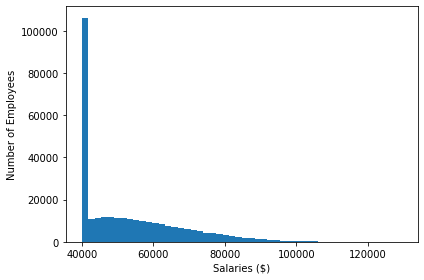

In [112]:
(n, bins, patches) = plt.hist(salary, bins = 50)
plt.xlabel('Salaries ($)')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


In [121]:
#Find the rane of bins
print(bins)

[ 40000.    41789.84  43579.68  45369.52  47159.36  48949.2   50739.04
  52528.88  54318.72  56108.56  57898.4   59688.24  61478.08  63267.92
  65057.76  66847.6   68637.44  70427.28  72217.12  74006.96  75796.8
  77586.64  79376.48  81166.32  82956.16  84746.    86535.84  88325.68
  90115.52  91905.36  93695.2   95485.04  97274.88  99064.72 100854.56
 102644.4  104434.24 106224.08 108013.92 109803.76 111593.6  113383.44
 115173.28 116963.12 118752.96 120542.8  122332.64 124122.48 125912.32
 127702.16 129492.  ]


In [122]:
#Find the count in each bin
print(n)

[1.06263e+05 1.09310e+04 1.14340e+04 1.15410e+04 1.15740e+04 1.14880e+04
 1.11970e+04 1.08710e+04 1.04090e+04 9.81400e+03 9.25300e+03 8.88800e+03
 8.30500e+03 7.54300e+03 7.10900e+03 6.59200e+03 6.01700e+03 5.45200e+03
 4.89000e+03 4.36200e+03 4.07900e+03 3.51800e+03 3.05300e+03 2.62100e+03
 2.29400e+03 1.96800e+03 1.67200e+03 1.39700e+03 1.18000e+03 9.92000e+02
 7.77000e+02 5.99000e+02 4.63000e+02 3.57000e+02 2.91000e+02 2.06000e+02
 1.68000e+02 1.38000e+02 8.40000e+01 7.30000e+01 4.40000e+01 4.20000e+01
 2.60000e+01 1.90000e+01 1.20000e+01 7.00000e+00 5.00000e+00 2.00000e+00
 3.00000e+00 1.00000e+00]


In [128]:
most_common_salary_count = n[0]

In [129]:
most_common_salary_range_left = bins[0]
most_common_salary_range_right = bins[1]

In [130]:
print(f"The most common salary range is between ${most_common_salary_range_left} & ${most_common_salary_range_right}. {most_common_salary_count} employees are in this salary bracket.")


The most common salary range is between $40000.0 & $41789.84. 106263.0 employees are in this salary bracket


In [131]:
avg_salary_by_title = pd.read_sql(
"SELECT title, ROUND(AVG(salary),2) AS avg_salary FROM titles JOIN employees as e ON (emp_title_id = title_id) JOIN salaries as s ON(e.emp_no = s.emp_no) GROUP BY title", engine)

In [132]:
avg_salary_by_title

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


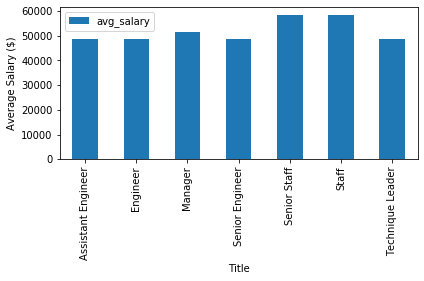

In [133]:
avg_salary_by_title.plot.bar(x = 'title')
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')
plt.tight_layout()